### Fit model

In [3]:
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from feature_extraction import features_from_image
from helpers import image_pair_gen

# list of generators (last one is used both for train and test)
usages = np.linspace(0.1, 1, 10)
image_gens = [image_pair_gen(u) for u in usages]

X, y_true = [], []
for gen in image_gens:
    X_cover, X_stego = [], []
    for cover, stego in itertools.islice(gen, 100):
        X_cover.append(features_from_image(cover))
        X_stego.append(features_from_image(stego))
    X.extend(np.array(X_cover + X_stego))
    y_true.extend(np.array([0] * len(X_cover) + [1] * len(X_stego)))
X = np.array(X)
y_true = np.array(y_true)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X, y_true)

RandomForestClassifier()

### Test each usage precision and recall

In [4]:
from sklearn.metrics import confusion_matrix
from feature_extraction import features_from_image
import itertools


conf_matrices = []

for gen, usage in zip(image_gens, usages):
    X_cover, X_stego = [], []
    for cover, stego in itertools.islice(gen, 50):
        X_cover.append(features_from_image(cover))
        X_stego.append(features_from_image(stego))
    X = np.array(X_cover + X_stego)
    y_true = np.array([0] * len(X_cover) + [1] * len(X_stego))

    y_pred = rf_model.predict(X)
    cf = confusion_matrix(y_true, y_pred)
    conf_matrices.append(cf)

In [5]:
PRECS = []
RECS = []
for cf in conf_matrices:
    TP = cf[1, 1]  # True Positives
    FN = cf[1, 0]  # False Negatives
    FP = cf[0, 1]  # False Positives
    TN = cf[0, 0]  # True Negatives
    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    PRECS.append(precision)
    RECS.append(recall)

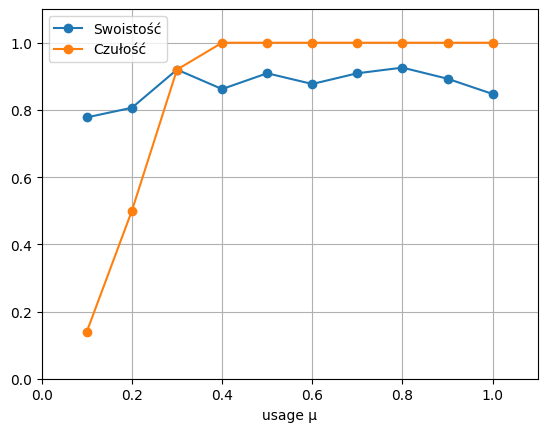

In [6]:
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

plt.plot(usages, PRECS, 'o-', label="Swoistość")
plt.plot(usages, RECS, 'o-', label="Czułość")
plt.ylim(0, 1.1)
plt.xlim(0, 1.1)
plt.xlabel('usage μ')
plt.grid()
plt.legend()

### Some nice plots

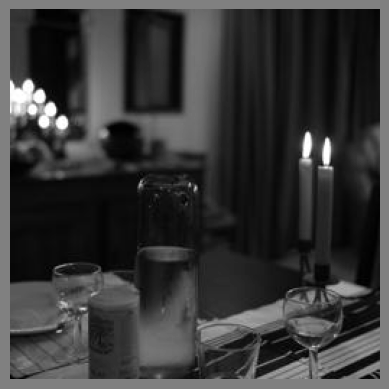

In [7]:
from helpers import show_image, image_pair_gen


cover, stego = next(image_pair_gen(1))
show_image(cover)

### Show diff

105.95422794117647
112.29961703431373


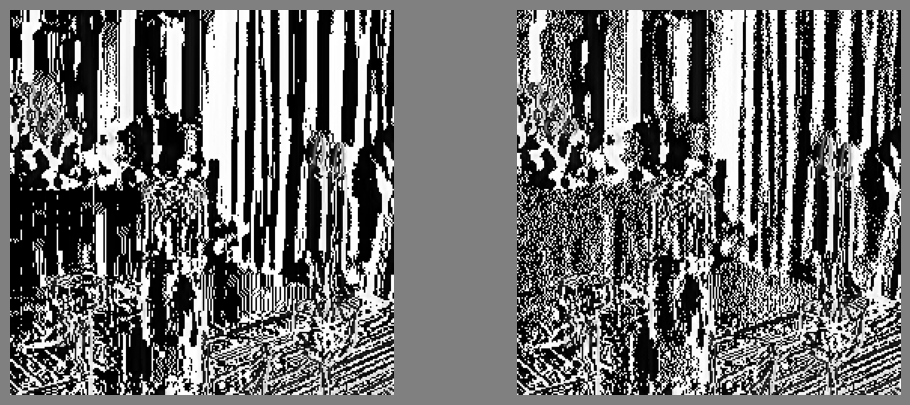

In [8]:
from matplotlib import pyplot as plt
import numpy as np

from feature_extraction import dct
from helpers import show_image, image_pair_gen




plt.figure(figsize=(12, 5))
# plt.subplot(1, 5, 1)
# show_image(cover, 'Cover')

plt.subplot(1, 2, 1)
show_image(np.diff(cover), '')
print(np.mean(np.diff(cover)))

plt.subplot(1, 2, 2)
show_image(np.diff(stego), '')
print(np.mean(np.diff(stego)))

# plt.subplot(1, 5, 4)
# show_image(np.diff(cover, axis=0), '')
# print(np.mean(np.diff(cover, axis=0)))

# plt.subplot(1, 5, 5)
# show_image(np.diff(stego, axis=0), '')
# print(np.mean(np.diff(stego, axis=0)))

# plt.tight_layout()

### Show DCT

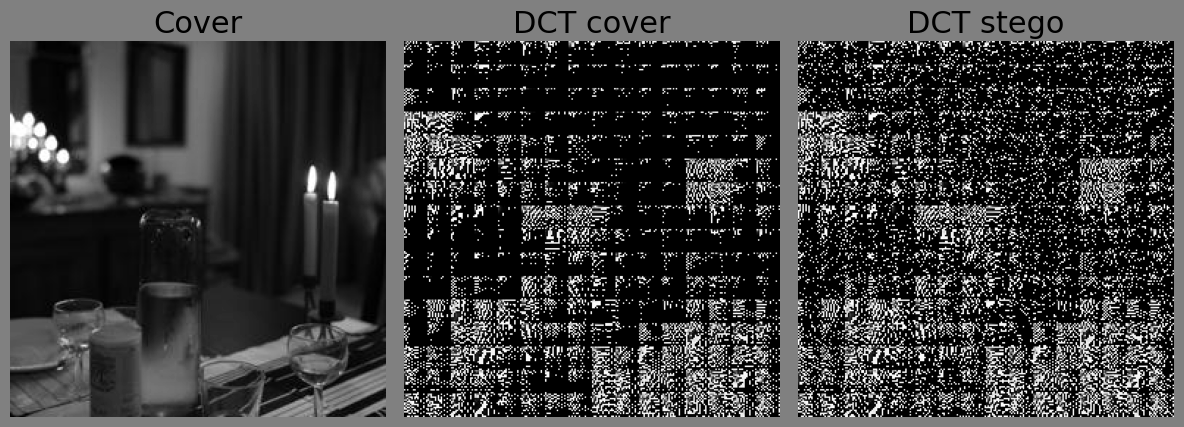

In [9]:
from matplotlib import pyplot as plt

from feature_extraction import dct
from helpers import show_image

# cover, stego = next(pair_gen)
cover_dct = dct(cover).reshape(256, 256)
stego_dct = dct(stego).reshape(256, 256)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
show_image(cover, 'Cover')
plt.subplot(1, 3, 2)
show_image(cover_dct, 'DCT cover')
plt.subplot(1, 3, 3)
show_image(stego_dct, 'DCT stego')
plt.tight_layout()

### Show mean

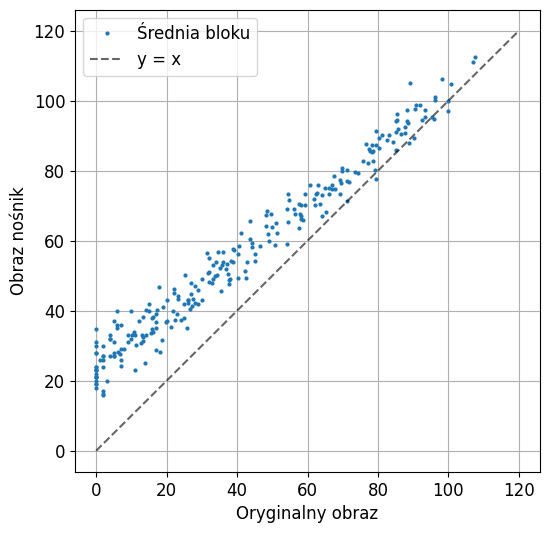

In [10]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.facecolor'] ='white'


# cover, stego = next(pair_gen)
N = 16
cover_data, stego_data = [], []
for block in dct(cover, N):
    cover_data.append(np.mean(block))
for block in dct(stego, N):
    stego_data.append(np.mean(block))
plt.figure(figsize=(6, 6))
plt.plot(cover_data, stego_data, 'o', markersize=2, label = 'Średnia bloku')
plt.plot((0, 120), (0, 120), 'k--', alpha=0.6, label='y = x')
plt.xlabel("Oryginalny obraz")
plt.ylabel("Obraz nośnik")
plt.legend()
plt.grid()
# plt.ylim(0, 10)
# plt.xlim(0, 10)

### Show variance

In [11]:
from helpers import image_pair_gen
# gen = image_pair_gen(1)

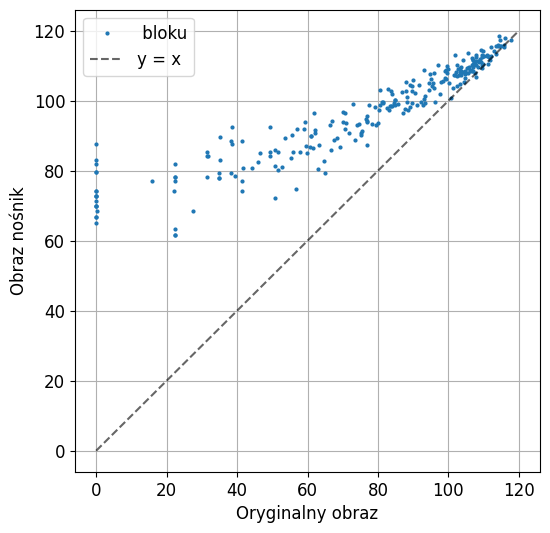

In [12]:
# cover, stego = next(gen)
N = 16
cover_data, stego_data = [], []
for block in dct(cover, N):
    cover_data.append(np.std(block))
for block in dct(stego, N):
    stego_data.append(np.std(block))

plt.figure(figsize=(6, 6))
plt.plot(cover_data, stego_data, 'o', markersize=2, label = ' bloku')
plt.plot((0, 120), (0, 120), 'k--', alpha=0.6, label='y = x')
plt.xlabel("Oryginalny obraz")
plt.ylabel("Obraz nośnik")
plt.legend()
plt.grid()

### Show entropy

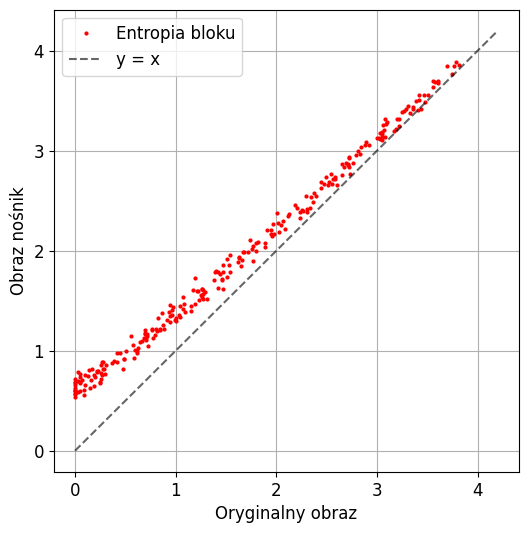

In [13]:
from matplotlib import pyplot as plt
from helpers import entropy
from feature_extraction import dct

# cover, stego = next(gen)
N = 16
cover_data, stego_data = [], []
for block in dct(cover, N):
    cover_data.append(entropy(block))
for block in dct(stego, N):
    stego_data.append(entropy(block))

plt.figure(figsize=(6, 6))
plt.plot(cover_data, stego_data, 'or', markersize=2, label = 'Entropia bloku')
plt.plot((0, 4.2), (0, 4.2), 'k--', alpha=0.6, label='y = x')
plt.xlabel("Oryginalny obraz")
plt.ylabel("Obraz nośnik")
plt.legend()
plt.grid()